<a href="https://colab.research.google.com/github/Emaperidol/AI_ML_Healthcare/blob/main/ML_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1. Read the data into Google Colab using .read_csv() function.**


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()
df_15 = pd.read_csv('Life Expectancy Data.csv')

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [ ]:
print(df_15)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

**Question 2. To simplify the analysis, for each country in the dataframe, only keep the most recent year of data (i.e., 2015) and remove the rest rows.**

In [ ]:
df_15 = df_15[df_15['Year'] == 2015]

**Question 3. To simplify the analysis further, only keep the afore-listed features (plus the country name) and the target in the dataframe and remove the other features. Index the dataframe using the country name.**

In [ ]:
print(df_15.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
selected_features = ['Country', 'Status', 'Life expectancy ', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'Polio',
'Diphtheria ', 'GDP',' thinness  1-19 years','Income composition of resources', 'Schooling']
df_clean = df_15[selected_features].set_index('Country')

**Question 4. Print the first and last ten rows of the dataframe using .head() and .tail() functions. How many observations (i.e., sample size) do you have in total?**

In [ ]:
print(df_clean.head(10))
print(df_clean.tail(10))
print ("Total Number of Observations:", len(df_clean))

                         Status  Life expectancy   Alcohol  \
Country                                                      
Afghanistan          Developing              65.0     0.01   
Albania              Developing              77.8     4.60   
Algeria              Developing              75.6      NaN   
Angola               Developing              52.4      NaN   
Antigua and Barbuda  Developing              76.4      NaN   
Argentina            Developing              76.3      NaN   
Armenia              Developing              74.8      NaN   
Australia             Developed              82.8      NaN   
Austria               Developed              81.5      NaN   
Azerbaijan           Developing              72.7      NaN   

                     percentage expenditure  Hepatitis B   BMI   Polio  \
Country                                                                  
Afghanistan                       71.279624         65.0   19.1    6.0   
Albania                          

**Question 5**

In [ ]:
print(df_clean['Life expectancy '].idxmax())
print(df_clean['Life expectancy '].idxmin())


Slovenia
Sierra Leone


**Question 6**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           183 non-null    object 
 1   Life expectancy                  183 non-null    float64
 2   Alcohol                          6 non-null      float64
 3   percentage expenditure           183 non-null    float64
 4   Hepatitis B                      174 non-null    float64
 5    BMI                             181 non-null    float64
 6   Polio                            183 non-null    float64
 7   Diphtheria                       183 non-null    float64
 8   GDP                              154 non-null    float64
 9    thinness  1-19 years            181 non-null    float64
 10  Income composition of resources  173 non-null    float64
 11  Schooling                        173 non-null    float64
dtypes: float64(1

**Question 7**

In [ ]:
print(df_clean['Status'].value_counts())


Developing    151
Developed      32
Name: Status, dtype: int64


**Question 8**

In [ ]:
print(df_clean.describe())


       Life expectancy     Alcohol  percentage expenditure  Hepatitis B  \
count        183.000000   6.000000              183.000000   174.000000   
mean          71.616940   5.288333                2.383906    82.425287   
std            8.123706   4.038115               27.461032    24.008492   
min           51.000000   0.010000                0.000000     6.000000   
25%           65.750000   2.492500                0.000000    78.750000   
50%           73.900000   5.285000                0.000000    93.000000   
75%           76.950000   8.017500                0.000000    97.000000   
max           88.000000  10.660000              364.975229    99.000000   

             BMI        Polio  Diphtheria            GDP  \
count  181.000000  183.000000   183.000000    154.000000   
mean    42.754144   83.207650    84.633880   7185.331746   
std     20.685702   24.245778    22.162793  11697.508913   
min      2.500000    5.000000     6.000000     33.681223   
25%     24.300000   83.0

**Question 9**

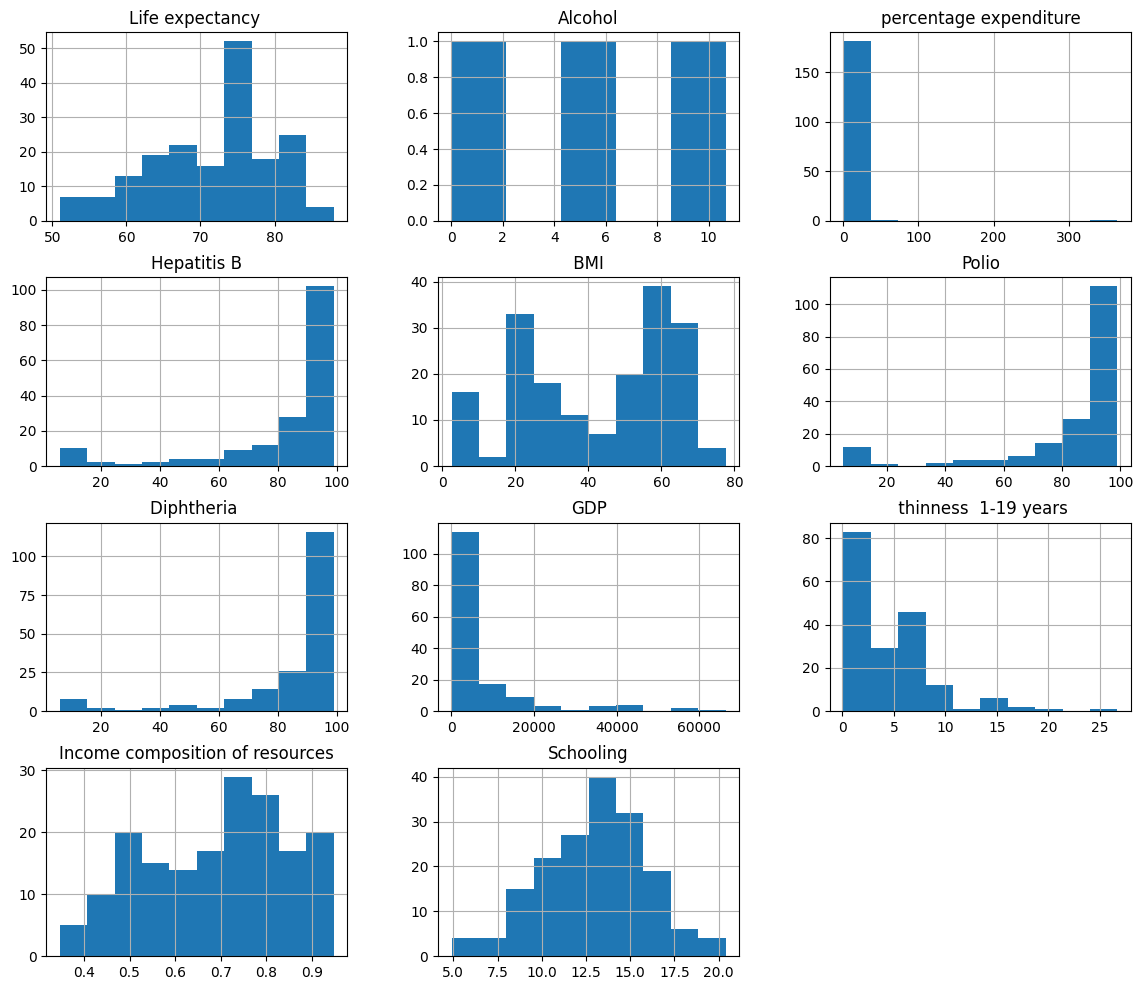

In [ ]:
import matplotlib.pyplot as plt

df_clean.hist(figsize=(14, 12))
plt.show()



**Question 10** -- Positive relationship

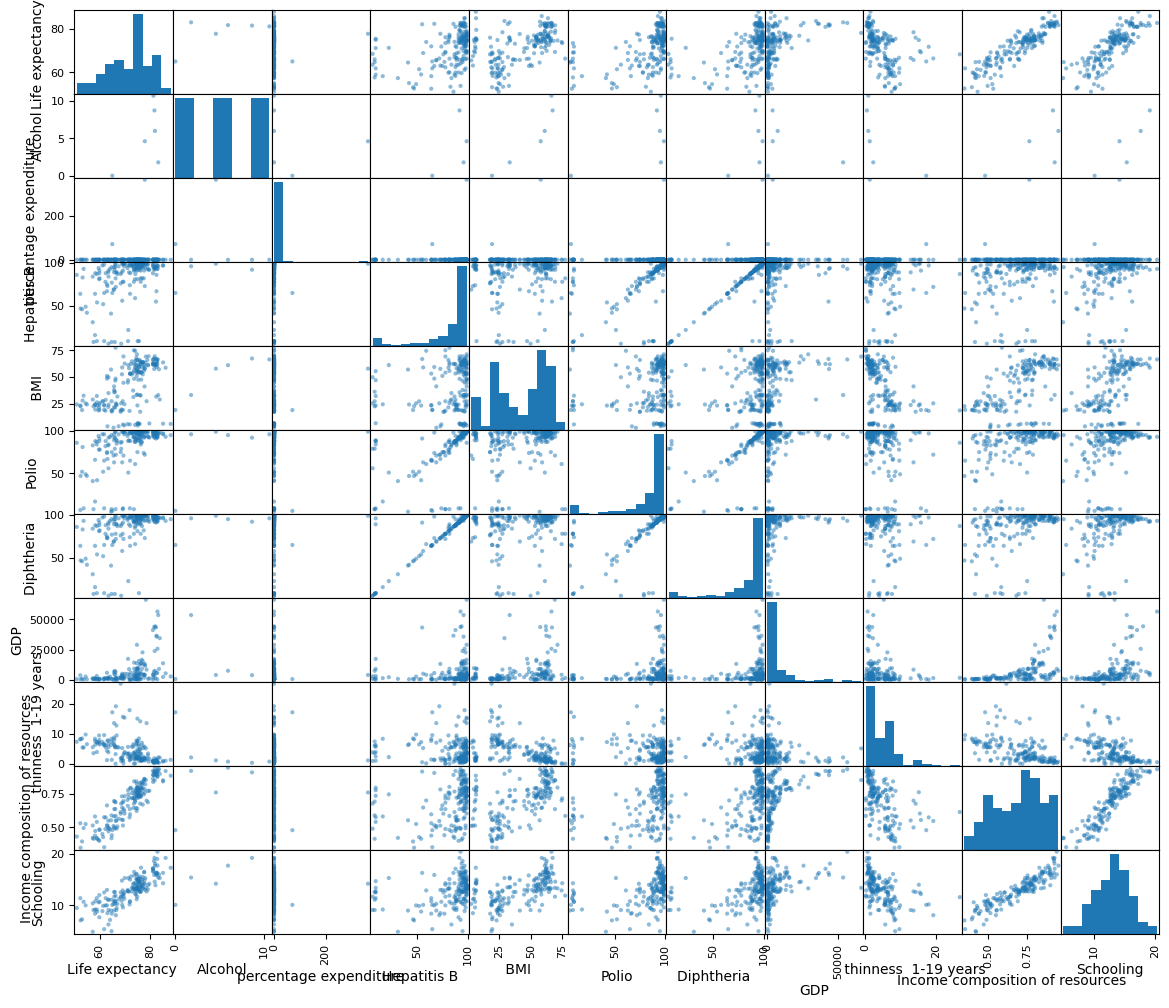

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns

scatter_matrix(df_clean, figsize=(14, 12))
plt.show()



**Question 11**

<Axes: xlabel='GDP', ylabel='Life expectancy '>

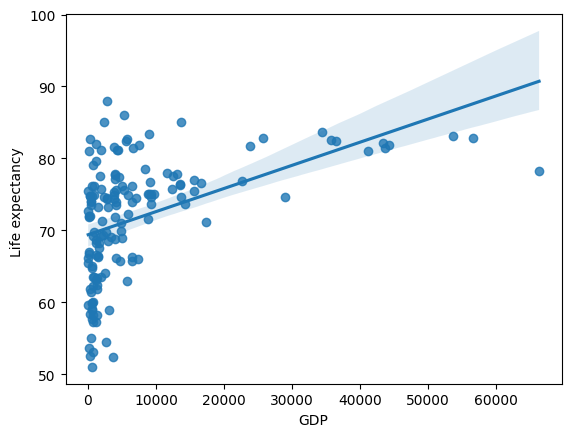

In [ ]:
import seaborn as sns

sns.regplot(x='GDP', y='Life expectancy ', data=df_clean)

#Positive relationship between GDP and life expectancy



**Question 12**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])



**Question 13**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_features = df_clean.columns.difference(['Status', 'Life expectancy '])
cat_features = ['Status']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', OneHotEncoder(), cat_features)
])


**Question 14**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("Life expectancy ", axis=1)
y = df_clean["Life expectancy "].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






**Question 15**

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)




**Question 16**

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)


**Question 17**

In [ ]:

lin_reg1 = LinearRegression()
lin_reg1.fit(X_train_prepared, y_train)


LinearRegression()

**Question 18**

In [ ]:
print(lin_reg1.predict(X_train_prepared)[:5])


[74.28072207 57.17686343 80.13993878 66.85026755 76.3782001 ]


**Question 19**

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg1.predict(X_test_prepared)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", lin_rmse)


RMSE: 4.949615157038572


**Question 20**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

frst_reg = RandomForestRegressor(random_state=42)
scores = cross_val_score(frst_reg, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
print("Mean RMSE:", forest_rmse_scores.mean())


Mean RMSE: 3.8773892763641244


**Question 21**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
]
grid_search = GridSearchCV(frst_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error")

grid_search.fit(X_train_prepared, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

**Question 22**

In [ ]:
print("The Best Parameters:", grid_search.best_params_)


The Best Parameters: {'max_features': 6, 'n_estimators': 30}


**Question 23**

In [ ]:
model_final = grid_search.best_estimator_
y_pred_final = model_final.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print("Final RMSE:", final_rmse)


Final RMSE: 4.168828376178379


**Question 24**

In [ ]:
model_final.fit(full_pipeline.fit_transform(X), y)
feature_importances = model_final.feature_importances_
all_features = num_features.tolist() + ["Status_Developed", "Status_Developing"]

sorted(zip(feature_importances, all_features), reverse=True)


[(0.37642705499967105, 'Income composition of resources'),
 (0.21077650939330103, 'Schooling'),
 (0.10599236891648152, ' thinness  1-19 years'),
 (0.09146493603172087, ' BMI '),
 (0.08287335211017637, 'Polio'),
 (0.05482240592523539, 'Diphtheria '),
 (0.03274498505397653, 'Hepatitis B'),
 (0.02495980570416478, 'GDP'),
 (0.014462077755821201, 'Status_Developing'),
 (0.004957005485243999, 'Status_Developed'),
 (0.0003226585489511156, 'Alcohol'),
 (0.00019684007525616715, 'percentage expenditure')]